# 复杂网络分析库 NetworkX 使用教程

NetworkX 是一个用 Python 语言开发的图论与复杂网络建模工具, 内置了常用的图与复杂网络分析算法, 可以方便的进行复杂网络数据分析、仿真建模等工作。NetworkX 支持创建简单无向图、有向图和多重图； 内置许多标准的图论算法，节点可为任意数据；支持任意的边值维度，功能丰富，简单易用。

## 内容
1. 创建图
2. 节点
3. 边
4. 节点与边的可用值
5. 访问边
6. 对图, 节点与边添加属性值
  - 图属性
  - 节点属性
  - 边属性
7. 有向图
8. 多重图
9. 图的生成与操作
10. 分析图
11. 图的绘制

让我们从这里开始学习使用 NetworkX.

<br/>

先设置一下忽略一些可能的信息警告:

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)  # ignore FutureWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)  # ignore DeprecationWarning

## 1. 创建图

创建一个没有节点与边的空白图.

In [2]:
import networkx as nx
G = nx.Graph()

根据定义, 图是由一堆节点(或称为顶点)以及由这些节点所确定的边(或称为链接)所构成的集合. 在 NetworkX 库中, 节点可以是任何可哈希化 (hashable) 的对象, 比如: 文本字符, 图像, XML 对象, 另一个图, 一个自定义的节点, 等等. 

(注意: Python 中的 None 对象不能用作图的节点. 因为在很多函数中, None 用于判断函数的可选参数是否赋值了.)

## 2. 节点

图 G 可以通过一些方法进行增长. NetworkX 中包含了很多的图生成方法与工具, 用于对图进行多种形式的读写.  
我们通过一个简单的操作示例来开始学习. 你可以一次添加一个节点:

In [3]:
G.add_node(1)

一次性添加一列的节点:

In [4]:
G.add_nodes_from([2, 3])

或者添加任意的节点群(nbunch). 一个 nbunch 指的是任意可迭代的节点集合体, 其中它本身并非作为图中的一个节点. 

(比如可以是: 一个列表 list, 集合 set, 图 graph, 文件 file, 等等...)

In [5]:
H = nx.path_graph(10)
G.add_nodes_from(H)

注意: 现在图 G 中包含的节点, 是图 H 中的节点集合. 相反, 你可以通过下面的方法把图 H 作为图 G 的一个节点:

In [6]:
G.add_node(H)

现在图 G 中包含了 H 作为它的一个节点. 这样的灵活性是非常强大的, 因为它允许了图中图(图的节点也是一个图), 文件图(图的节点为文件), 函数图(图的节点为函数)等等形式的图的存在.

关于如何构建你的应用, 以使得节点是有用的实体, 这是一个值得去思考的问题.

当然, 如果你喜欢的话, 你可以总是在 G 中使用唯一标识符(unique identifier), 通过标识符作为键以构建不同的字典, 去标识节点中的信息. (注意: 假如节点对象的哈希方法是依赖于节点中内容的话, 你不应该去修改节点的对象.)

## 3. 边

图 G 也可以通过一次添加一条边来进行增长:

In [7]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # 解包边的元组

一次性添加一列的边:

In [8]:
G.add_edges_from([(1, 2), (1, 3)])

或者添加任意的边群(ebunch). 一个 ebunch 指的是任意可迭代的边元组(edge-tuple)集合体. 

其中, 一个边元组(edge_tuple)可以是由两个节点组成的二元组. 比如: (1, 2) 表示一条边, 其中边的两个节点分别为 1 与 2;   
或者是一个三元组, 其中元组的前两个元素表示节点, 第三个元素为边的属性字典(edge attribute dictionary). 比如: (2, 3, {'weight': 3.1415}) 表示一条包含节点2 与 3的边, 这条边有一个名为 weight 的属性, 它的值为 3.1415.

我们将在下面, 再去讨论有关边的属性.

In [9]:
G.add_edges_from(H.edges())  # 将图 H 中的所有边, 添加到图 G 中

我们可以通过以下类似的方法, 去拆除图中的节点或边:

```
Graph.remove_node(),
Graph.remove_nodes_from(),
Graph.remove_edge(),
Graph.remove_edges_from(),
等等...
```

In [10]:
G.remove_node(H)

当向图中添加之前已经存在的节点或边时, 将不会有任何的提示或反馈信息. 比如, 在清除了图 G 中全部的节点与边后:

In [11]:
G.clear()

我们向图 G 中添加新的节点或边, NetworkX 库将对已经存在的节点/边静静地忽略掉:

In [12]:
G.add_edges_from([(1, 2), (1, 3)])  # 添加边1-2, 1-3
G.add_node(1)  # 添加节点1 (因为节点1已经存在了, 这次的添加将被忽略)
G.add_edge(1, 2)  # 添加边1-2 (因为这个边已经存在了, 这次的添加将被忽略)
G.add_node("spam")  # 添加节点 "spam"
G.add_nodes_from("spam")  # 添加4个节点: 's', 'p', 'a', 'm' 

此时, 图 G 中包含了8个节点以及2条边. 可以通过下面的方式查看一下:

In [13]:
G.number_of_nodes()

8

In [14]:
G.number_of_edges()

2

我们也可以通过下面的方法, 检查一下图 G 中节点与边的具体信息:

In [15]:
G.nodes()  # 获取图中的全部节点 (将返回一个包含全部节点标签名的数组)

['a', 1, 2, 3, 'spam', 'm', 'p', 's']

In [16]:
G.edges()  # 获取图中的全部边 (将返回一个数组, 其中每个元素为一个二元组, 表示一条边)

[(1, 2), (1, 3)]

In [17]:
G.neighbors(1)  # 获取节点1的邻接节点 (将返回一个数组, 包含节点1的全部邻接节点标签名)

[2, 3]

删除节点或边也可以使用类似的方式:

In [18]:
G.remove_nodes_from("spam")  # 一次性删除4个节点: 's', 'p', 'a', 'm'
G.nodes()

[1, 2, 3, 'spam']

In [19]:
G.remove_edge(1, 3)  # 删除边1-3 (注意, 其中的节点1与3并不会被删除, 仅仅是删除节点间的边)
G.edges()

[(1, 2)]

In [20]:
G.nodes()  # 检查一下现在图 G 中的节点情况

[1, 2, 3, 'spam']

当创建一个图结构, 在实例化图的类对象时, 你可以通过多种格式方式, 指定你初始化时的数据:

In [21]:
H = nx.DiGraph(G)  # 创建一个有向图, 通过使用图 G 中的连接关系(包括节点与边的信息)
H.edges()  # 获取图 H 中的边

[(1, 2), (2, 1)]

注意, 这里的 H 是一个有向图, 在输出边信息时, (1, 2) 与 (2, 1) 是两条不同的边.  
(1, 2) 表示从节点1指向节点2的边; 而(2, 1) 表示从节点2指向节点1的边. 其中节点的顺序中暗含了边的指向.

In [22]:
edge_list = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edge_list)
H.edges()

[(0, 1), (1, 2), (2, 3)]

## 4. 节点与边的可用值

你可能注意到了, 节点与边在 NetworkX 对象中是未指定类型的. 这可以让你自由地去使用有意义的条项作为节点与边.  
最常用的选择是数字或字符串, 但其实, 节点可以是任意的可哈希化(hashable)对象(None除外).  
而使用 G.add_edge(n1, n2, object=x) 方法, 边可以是与对象 x 相关的任意东西.

例如, 节点 n1 与 n2 可以为RCSB蛋白质数据银行(RCSB Protein Data Bank)中的蛋白质对象(protein objects),  
而边 x 可以表示详述它们相互作用的实验观测记录中的一条 XML 记录.

我们可以发现, 能够随意的定义节点和边的对象类型是相当有用的. 但除非你对于 Python 非常熟悉, 否则随意的滥用这种自由性的话,  
将很可能会导致不可意料的问题出现.  
如果你有疑惑的话, 你应考虑使用 convert_node_labels_to_integers() 方法, 去得到一个带有数字标签的传统图.

## 5. 访问边

除了方法 Graph.nodes(), Graph.edges() 与 Graph.neighbors(), 当你只是想遍历一个图时, 你可以使用迭代器的方式.  
比如: Graph.edges_iter(), 这可以使得你免于创建大量的列表结构数据, 从而节省内存使用.

通过下标符号, 也可以快速的访问图的数据结构.

__Warning: 不要去修改返回的字典值--它是图数据结构的一部分, 直接操纵它的话, 可能会让图处于一个数据不一致的状态.__

In [23]:
G[1]  # 警告: 不要修改返回的结果字典值

{2: {}}

In [24]:
G[1][2]

{}

假设边已经存在了, 你可以通过下标符号的方式安全的去设置边的属性值:

In [25]:
G.add_edge(1, 3)
G[1][3]['color'] = 'blue'

通过邻接迭代器, 可以实现全部边的快速访问. 需要注意的是, 对于无向图, 这种方式实际上会访问每条边两次.

In [26]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adjacency_iter():
    for nbr, eattr in nbrs.items():
        data = eattr['weight']
        if data < 0.5:
            print('(%d, %d, %.3f)' % (n, nbr, data))

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


## 6. 对图, 节点与边添加属性值

### 6.1 图属性

In [27]:
G = nx.Graph(day='Friday')
G.graph

{'day': 'Friday'}

In [28]:
G.graph['day'] = 'Monday'
G.graph

{'day': 'Monday'}

### 6.2 节点属性

In [29]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.node[1]

{'time': '5pm'}

In [30]:
G.node[1]['room'] = 714
G.nodes(data=True)

[(1, {'room': 714, 'time': '5pm'}), (3, {'time': '2pm'})]

### 6.3 边属性

In [31]:
G.add_edge(1, 2, weight=4.7)
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edge[1][2]['weight'] = 4

## 7. 有向图

In [32]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])

In [33]:
DG.out_degree(1, weight='weight')  # 出度

0.5

In [34]:
DG.in_degree(1, weight='weight')  # 入度

0.75

In [35]:
DG.degree(1, weight='weight')  # 度(出度+入度)

1.25

In [36]:
DG.successors(1)  # 后继节点

[2]

In [37]:
DG.predecessors(1)  # 前继节点

[3]

In [38]:
DG.neighbors(1)  #  邻接节点

[2]

In [39]:
H = nx.Graph(G)  # 转换图 G 为无向图

## 8. 多重图

In [40]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
MG.degree(weight='weight')

{1: 1.25, 2: 1.75, 3: 0.5}

In [41]:
GG = nx.Graph()
for n, nbrs in MG.adjacency_iter():
    print(n, '-->', nbrs)
    for nbr, edict in nbrs.items():
        min_value = min([d['weight'] for d in edict.values()])
        GG.add_edge(n, nbr, weight=min_value)

(1, '-->', {2: {0: {'weight': 0.5}, 1: {'weight': 0.75}}})
(2, '-->', {1: {0: {'weight': 0.5}, 1: {'weight': 0.75}}, 3: {0: {'weight': 0.5}}})
(3, '-->', {2: {0: {'weight': 0.5}}})


In [42]:
nx.shortest_path(GG, 1, 3)

[1, 2, 3]

## 9. 图的生成与操作

在构建图结构时, 除了一个一个节点, 或者一边一边条的方式, 也可以通过下面的方式:

#### 1. 经典的图操作, 例如:

```
subgraph(G, nbunch)        - 根据节点群nbunch, 获取图 G 的子图
union(G1, G2)              - 连结多个图成为一个图
disjoint_union(G1, G2)     - 将多个图中不同的节点集, 连结为一个新的图
cartesian_product(G1, G2)  - 返回笛卡尔积图
compose(G1, G2)            - 将多个图中的共同节点, 合成一个新的图
complement(G)              - 实现图
create_empty_copy(G)       - 根据图 G 的图类型, 返回一个空的拷贝
convert_to_undirected(G)   - 获取图 G 对应的无向图
convert_to_directed(G)     - 获取图 G 对应的有向图
```

#### 2. 创建经典的小众图, 例如:

```
petersen = nx.petersen_graph()    # 彼得森图
tutte = nx.tutte_graph()          # 塔特图
maze = nx.sedgewick_maze_graph()  # 塞奇威克迷宫图
tet = nx.tetrahedral_graph()      # 四面体图
```

#### 3. 使用构造生成器创建经典图, 例如:

```
K_5 = nx.complete_graph(5)                   # 完全图
K_3_5 = nx.complete_bipartite_graph(3, 5)    # 完全二分图
barbell = nx.barbell_graph(10, 10)           # 杠铃图
lollipop = nx.lollipop_graph(10, 20)         # 棒棒糖图
```

#### 4. 使用随机图生成器, 例如:

```
er = nx.erdos_renyi_graph(100, 0.15)      # ER随机图
ws = nx.watts_strogatz_graph(30, 3, 0.1)  # WS小世界网络
ba = nx.barabasi_albert_graph(100, 5)     # BA无标度网络
red = nx.random_lobster(100, 0.9, 0.9)    # lobster随机图
```

#### 5. 以常用的图格式读取存储在文件中的图, 比如: 边列表, 邻接表, GML, GraphML, pickle, LEDA与其它等等.

```
nx.write_gml(red, "path.to.file")
my_graph = nx.read_gml("path.to.file")
```

## 10. 分析图

可以使用多种的图理论方法, 对图的结构进行分析. 比如:

In [43]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")  # 添加节点 "spam"

In [44]:
[list(c) for c in nx.connected_components(G)]

[[1, 2, 3], ['spam']]

In [45]:
sorted(nx.degree(G).values())

[0, 1, 1, 2]

In [46]:
nx.clustering(G)

{1: 0.0, 2: 0.0, 3: 0.0, 'spam': 0.0}

以下方法返回节点的属性, 其中字典的键名为节点的标签值:

In [47]:
nx.degree(G)

{1: 2, 2: 1, 3: 1, 'spam': 0}

对于特定的节点值, 你可以通过传入单一的节点或者一个节点群(nbunch)作为参数.  
如果指定的是单一节点, 将返回单一的值;  
如果是节点群(nbunch)的话, 将返回一个字典. 其中字典中的键对应为节点群的中每一元素.

In [48]:
nx.degree(G, 1)

2

In [49]:
G.degree(1)

2

In [50]:
G.degree([1, 2])

{1: 2, 2: 1}

In [51]:
sorted(G.degree([1, 2]).values())

[1, 2]

In [52]:
sorted(G.degree().values())

[0, 1, 1, 2]

## 11. 绘制图

NetworkX 主要并非是一个图的绘制库, 但它其中包含了开源的软件库 Graphviz, 底层通过使用 Matplotlib 的接口, 去实现图的绘制.  
绘制功能作为软件包 networkx.drawing 的一部分, 你可以在有需要的时候导入它.

注意: NetworkX 中的绘制库, 现在还没兼容 Python3.0 及以上的版本.

首先, 导入 mathplotlib 中的 plot 接口(或者 pylab 也可以):

In [53]:
import matplotlib.pyplot as plt

为了测试 networkx.drawing 是否已成功导入, 可以通过下面的方式绘制图 G 试下:

In [54]:
nx.draw(G)
# nx.draw_random(G)
# nx.draw_circular(G)
# nx.draw_spectral(G)

/usr/local/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/usr/local/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python2.7/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


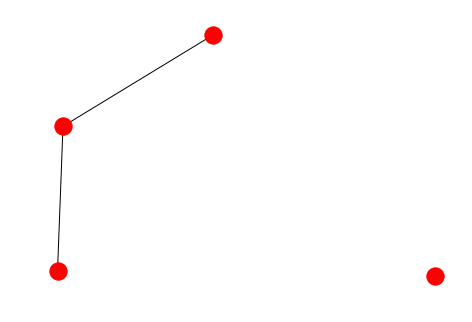

In [55]:
plt.show()  # 需要调用 show() 方法, 才能显示出绘制的图

保存绘制的图到文件中, 可以使用下面的方式:

In [56]:
nx.draw(G)
plt.savefig("temp_file_g.png")

以上将写文件 "temp_file_g.png" 到本地目录下.  
若 Graphviz 与 PyGraphviz, 或者 pydot 库在你的系统中是可用的话, 你也可以使用下面的方式保存图到文件中:

In [57]:
try:
    nx.draw_graphviz(G)
    nx.write_dot(G, 'temp_file_g.dot')
except AttributeError as e:
    if "graphviz_layout" in str(e):
        print('AttributeError:', e)
except ImportError as e:
    if "pygraphviz" in str(e):
        print("ImportError:", e)

('AttributeError:', AttributeError("'module' object has no attribute 'graphviz_layout'",))
